In [13]:
import numpy as np
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

In [4]:
# Run code extracting the sigma_x, sigma_y and theta from the images
# The code needs to be run separetely because of the optimization function output hitting jupyter's size limit
#%run PSF-map-code

In [14]:
# Read data produced by PSF-map-code.py
with open("sigma_x_map.dat", "r") as tf:
    sigma_x_map = np.fromfile(tf)
sigma_x_map = sigma_x_map.reshape((4176, 6248))
sigma_x_map[sigma_x_map > 20] = 20
sigma_x_map[sigma_x_map == 0] = None

with open("sigma_y_map.dat", "r") as tf:
    sigma_y_map = np.fromfile(tf)
sigma_y_map = sigma_y_map.reshape((4176, 6248))
sigma_y_map[sigma_y_map > 20] = 20
sigma_y_map[sigma_y_map == 0] = None

with open("theta_map.dat", "r") as tf:
    theta_map = np.fromfile(tf)
theta_map = theta_map.reshape((4176, 6248))
theta_map[theta_map > 2*np.pi] = None
theta_map[theta_map == 0] = None

sigma_map = np.sqrt(sigma_x_map**2 + sigma_y_map**2)


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5749/2408286631.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


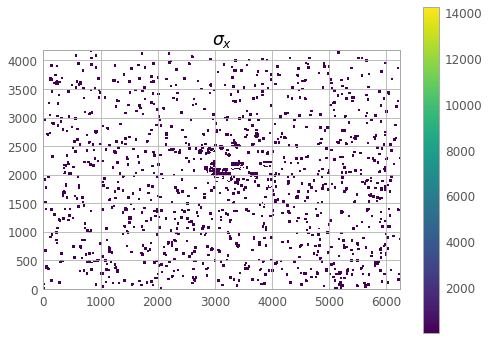

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5749/2408286631.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


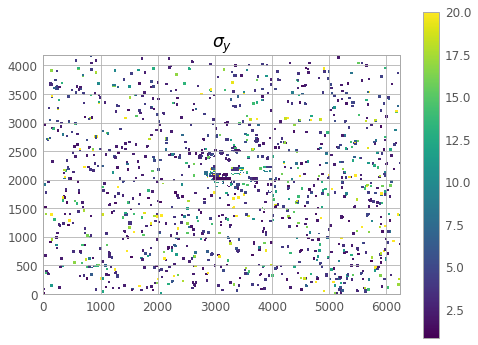

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5749/2408286631.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


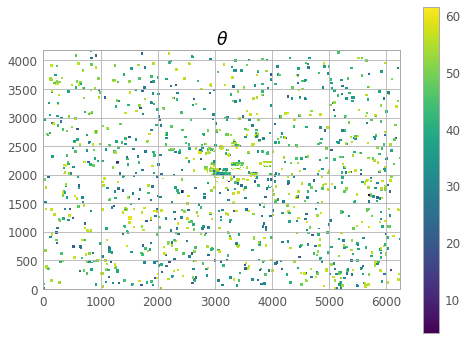

In [15]:
plt.figure()
plt.title(r'$\sigma_x$')
plt.imshow(np.abs(sigma_x_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\sigma_y$')
plt.imshow(np.abs(sigma_y_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\theta$')
plt.imshow(theta_map*180/np.pi, origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5749/233848496.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


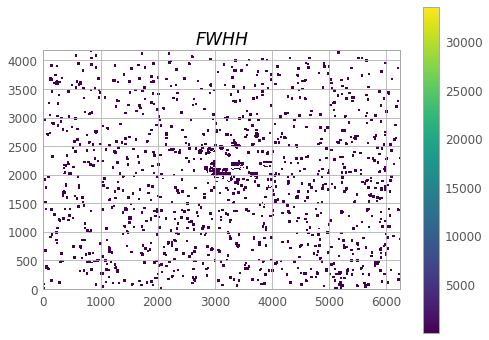

In [16]:
coeff = 2*np.sqrt(2*np.log(2))

plt.figure()
plt.title(r'$FWHH$')
plt.imshow(np.abs(coeff * sigma_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


nan


(array([2.000000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.000000e+01, 2.119129e+06]),
 array([-14269.11345843, -12840.20211259, -11411.29076674,  -9982.3794209 ,
         -8553.46807506,  -7124.55672922,  -5695.64538337,  -4266.73403753,
         -2837.82269169,  -1408.91134584,     20.        ]),
 <BarContainer object of 10 artists>)

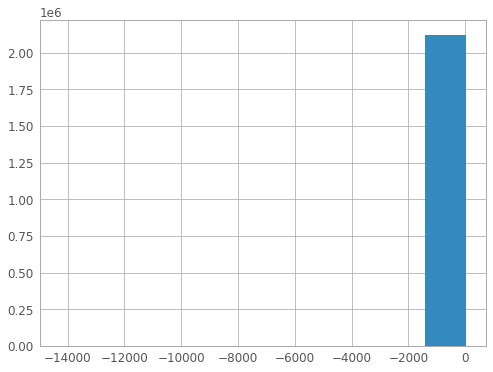

In [25]:
print(np.min(sigma_y_map))
plt.figure()
plt.hist(sigma_x_map.flatten(), bins=10)